### Importing major libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# Setting appropriate styles
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(6,4)

In [4]:
#url for the poll data
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

df=pd.read_csv(url)
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [5]:
# checking meta data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             1522 non-null   

#### we can see there are some columns with null values. we can deal with them later during preprocessing and transformation phase before modeling.

## Who was being polled and are they connected to any party? Let's check

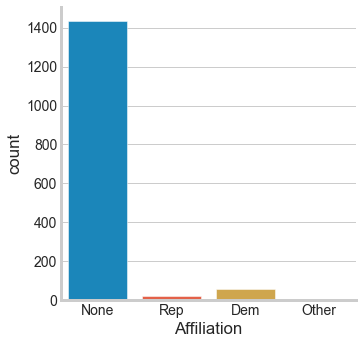

In [19]:
sns.catplot('Affiliation', kind='count', data=df )

#### Max pollers belong to None category. Although Democratic associations are more than Republicans

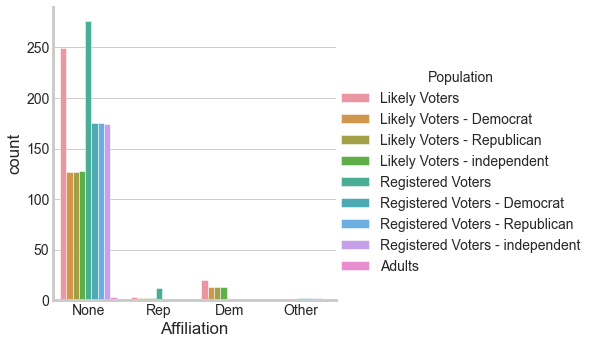

In [23]:
# Let's check the affilication w.r.t expected voters
sns.catplot('Affiliation', data=df, hue='Population', kind='count')

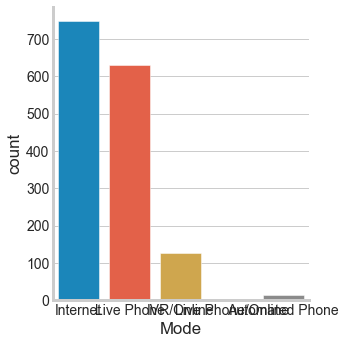

In [37]:

sns.catplot('Mode', data=df, kind='count', orient='h')
plt.tight_layout()

### Central tendency and dispersion of the polls

In [42]:
# Mean poll data
avg=df[['Trump', 'Clinton', 'Other', 'Undecided']].mean()
avg

Trump        40.643890
Clinton      42.733903
Other         5.806011
Undecided     9.315068
dtype: float64

In [43]:
# Standard deviation of the poll 
std=df[['Trump', 'Clinton', 'Other', 'Undecided']].std()
std

Trump        23.566390
Clinton      25.298731
Other         5.009533
Undecided     6.253118
dtype: float64

#### It seems the poll favors Clinton however the fight is really close

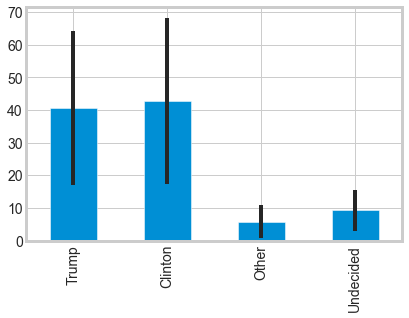

In [44]:
avg.plot(yerr=std, kind='bar')

In [47]:
df.nunique()

Pollster                   53
Start Date                267
End Date                  246
Entry Date/Time (ET)      459
Number of Observations    607
Population                  9
Mode                        5
Trump                      77
Clinton                    81
Other                      33
Undecided                  37
Pollster URL              459
Source URL                408
Partisan                    3
Affiliation                 4
Question Text              56
Question Iteration          2
dtype: int64

In [48]:
categorical_cols=df.select_dtypes(exclude=np.number).columns
numerical_cols=df.select_dtypes(include=np.number).columns

In [51]:
for col in categorical_cols:
    print("-----Column-----{}-------".format(col))
    print("Total Unique values are : {}".format(df[col].nunique()))
    print("top 10 unique values are {}".format(df[col].unique()[:10]))
    print("\n")

-----Column-----Pollster-------
Total Unique values are : 53
top 10 unique values are ['Insights West' 'IBD/TIPP' 'YouGov/Economist' 'Lucid/The Times-Picayune'
 'Bloomberg/Selzer' 'ABC/Post' 'Monmouth University' 'FOX' 'Ipsos/Reuters'
 'Rasmussen']


-----Column-----Start Date-------
Total Unique values are : 267
top 10 unique values are ['2016-11-04' '2016-11-03' '2016-11-02' '2016-10-31' '2016-11-01'
 '2016-10-30' '2016-10-28' '2016-10-29' '2016-10-27' '2016-10-24']


-----Column-----End Date-------
Total Unique values are : 246
top 10 unique values are ['2016-11-07' '2016-11-06' '2016-11-05' '2016-11-04' '2016-11-03'
 '2016-11-02' '2016-11-01' '2016-10-31' '2016-10-30' '2016-10-29']


-----Column-----Entry Date/Time (ET)-------
Total Unique values are : 459
top 10 unique values are ['2016-11-08T12:16:30Z' '2016-11-08T12:10:06Z' '2016-11-07T21:25:46Z'
 '2016-11-07T15:43:26Z' '2016-11-07T12:18:47Z' '2016-11-07T20:19:38Z'
 '2016-11-07T16:02:39Z' '2016-11-07T15:12:41Z' '2016-11-08T12:06

 ### Let's check the mean poll results variation over time

In [76]:
# converting date column to pandas date time object
df['End Date']=pd.to_datetime(df['End Date'])

In [83]:
# resampling the data to have monthly accumulated mean data for comparison
df_new=df[['End Date', 'Trump', 'Clinton']].set_index('End Date').resample(rule='M').mean()

In [84]:
df_new

,Trump,Clinton
End Date,,
2015-05-31,34.250000,48.750000
2015-06-30,35.666667,52.000000
2015-07-31,38.428571,50.666667
2015-08-31,43.875000,45.208333
2015-09-30,42.962963,46.185185
2015-10-31,43.857143,44.250000
2015-11-30,43.730769,45.307692
2015-12-31,43.666667,46.333333
2016-01-31,45.000000,44.705882


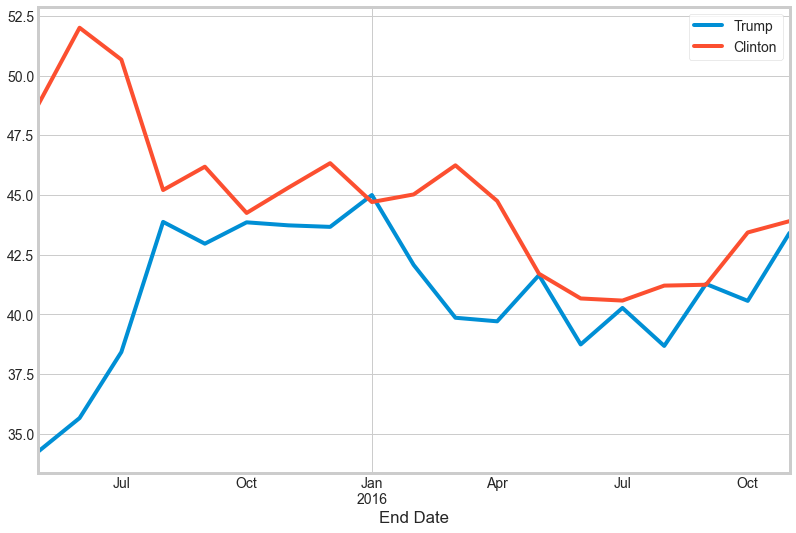

In [74]:
# Plotting monthly mean poll results to estimate if poll results changed over time
df_new.plot(figsize=(12,8), legend=True)


plt.show()

## It can be seen that the ratings didn't change much over time. These are not weighted avg ratings but just the mean poll scores over time.

In [98]:
# This concludes the EDA of this dataset